In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist
mnist = tf.keras.datasets.mnist
(training_images, training_labels) , (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(training_images))
print(len(test_images))


60000
10000


In [ ]:
print(training_labels[4])

9


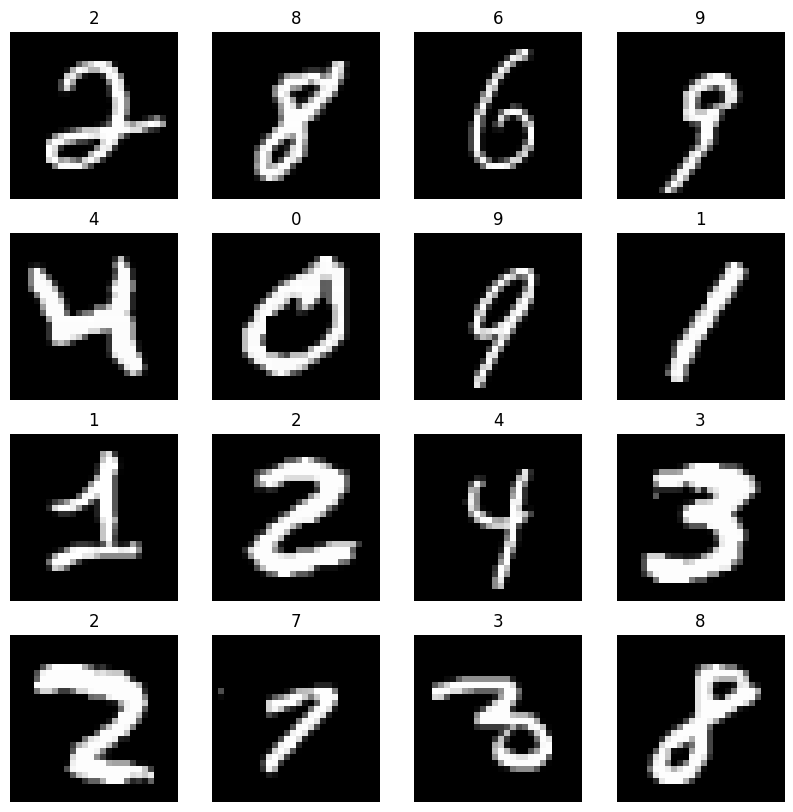

(28, 28)


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Selecting 16 images from the training set
images = x_train[16:32]

# Plot the images in a 4x4 configuration
plt.figure(figsize=(10, 10)) #creates a figure with a width and height of 10 inches. This will ensure that the images are displayed in a large enough size to be easily visible.
for i in range(16): #creates a loop that will iterate 16 times. The loop will index the images in the images array, starting from 0 and ending at 15.
  plt.subplot(4, 4, i + 1) #creates a subplot in the figure. The subplot will have 4 rows and 4 columns, and the current iteration of the loop will determine the index of the subplot.
  plt.imshow(images[i], cmap="gray") #plots image at current index in grayscale
  plt.title(str(y_train[i+16]))
  plt.axis("off") #removes the axis labels from the subplot. This will make the plot look cleaner and more concise.


plt.show()

print(images[0].shape)

LABEL: 9

IMAGE PIXEL ARRAT:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 

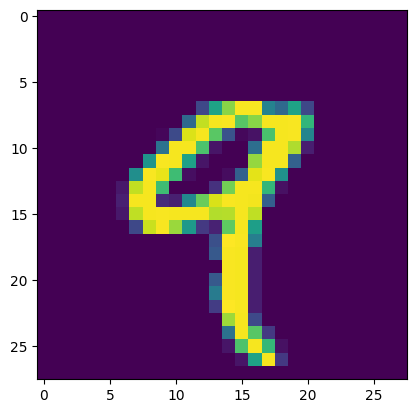

In [ ]:
#You can put between 0 to 59999 here
index=4

#Set number of characters per row when printing
np.set_printoptions(linewidth=320)

#Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAT:\n {training_images[index]}')

#Visualize the image

plt.imshow(training_images[index])

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest')

test_datagen=ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest')

In [ ]:
# Build the model.
model = tf.keras.models.Sequential([
                  tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)),
                  tf.keras.layers.MaxPooling2D(2,2),
                  tf.keras.layers.Conv2D(128 ,(3,3),activation='relu'),
                  tf.keras.layers.MaxPooling2D(2,2),


                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(10, activation='softmax')
])

#Print summary
model.summary()

#use same settings
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=10)

#Evaluate on the test
print(f'\MODEL EVALUATION:')
test_loss = model.evaluate(test_images,test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [ ]:
print(test_labels[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [ ]:
print(test_labels[0])
print(test_labels[16])
print(test_labels[30])

7
9
3


1/1 [==============================] - 0s 26ms/step


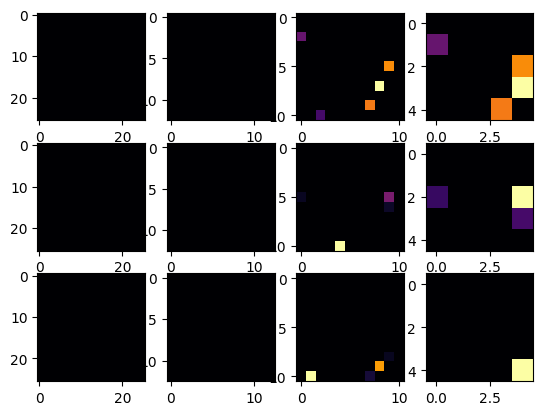

In [ ]:
#just to show how convolutions work
from tensorflow.keras import models
f, axarr= plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=16
THIRD_IMAGE=30
CONVOLUTION_NUMBER=1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 10s 32ms/step - loss: 0.0364 - accuracy: 0.9916


[0.03642052784562111, 0.991599977016449]

In [ ]:
import cv2
# Predict the digit in a new image
# Read the image in grayscale
image = cv2.imread("/content/7.3.jpg", 0)  #current image 28x28x3

# Reshape the image
image = image.reshape((1, 28, 28)) #1 for grayscaling

# Predict the digit in the image
prediction = model.predict(image)


print("The digit in the image is: " + str(np.argmax(prediction)))

1/1 [==============================] - 0s 70ms/step
The digit in the image is: 7


In [ ]:
import cv2
import numpy as np

def slice_image(image):
  """Slices an image into 10 slices of 28x28."""
  width, height = image.shape[1], image.shape[0]
  slices = np.zeros((10, 28, 28, 3), dtype=np.uint8)
  for i in range(10):
    start_x = i * 28
    end_x = start_x + 28
    start_y = 0
    end_y = height
    slices[i] = image[start_y:end_y, start_x:end_x]
  return slices

image = cv2.imread("280x28 wali image2.jpg")
slices = slice_image(image)

for i in range(10):
  cv2.imwrite("slice_{}.jpg".format(i), slices[i])

In [ ]:
import cv2
# Predict the digit in a new image
# Read the image in grayscale
image = cv2.imread("/content/slice_8.jpg", 0)

# Reshape the image
image = image.reshape((1, 28, 28))

# Predict the digit in the image
prediction = model.predict(image)


print("The digit in the image is: " + str(np.argmax(prediction)))

1/1 [==============================] - 0s 39ms/step
The digit in the image is: 5


The code below is not used it is for my experimental use

In [ ]:
##model.save('model.h5')

In [ ]:
##from google.colab import files
##files.download('model.h5')

In [ ]:

##import numpy as np
##from google.colab import files
##from tensorflow.keras.utils import load_img, img_to_array


##uploaded = files.upload()

##for fn in uploaded.keys():

##  # predicting images
##  path = '/content/' + fn
##  img = load_img(path, target_size=(28, 28,1))
##  img= cv2.imread("uploaded",0)

##  x = img_to_array(img)

##  x /= 255
 ### x = np.expand_dims(x, axis=0)


 # classes = model.predict(img, batch_size=10)
 # print(classes[0])
  #digit = np.argmax(classes[0])
  #if digit == 0:
   # print(fn + " is a 0")
  #elif digit == 1:
    #print(fn + " is a 1")
  #elif digit == 2:
    #print(fn + " is a 2")
  #elif digit == 3:
    #print(fn + " is a 3")
  #elif digit == 4:
   # print(fn + " is a 4")
 # elif digit == 5:
  #  print(fn + " is a 5")
  #elif digit == 6:
 #   print(fn + " is a 6")
 # elif digit == 7:
 #   print(fn + " is a 7")
 # elif digit == 8:
 #   print(fn + " is a 8")
 # else:
#    print(fn + " is a 9")